# Iris Flow Classification

In this notebook I will look at a dataset containing 150 images of the Iris flower.

Using a logistic regression model, I will predict the type of Iris flower the image is; Setosa, Versicolour or Virginica.

#### The classes that the model will focus on are:
    - Sepal length
    - Sepal width
    - Petal length
    - Petal width
    

*The documentation can be found on: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html*

In [2]:
# General
import pandas as pd

# Ignoring warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data viz
import seaborn as sn
import matplotlib.pyplot as plt

# Logistic regression
from sklearn.linear_model import LogisticRegression

# Confusion matrix
from sklearn.metrics import confusion_matrix

# Spilitting data; train & test
from sklearn.model_selection import train_test_split

In [3]:
# Importing dataset from SkLearn
from sklearn.datasets import load_iris

In [4]:
# Storing the dataset into a variable
iris = load_iris()

# Printing how the 2d array data looks like and the general data shape
print(f"The 2d array looks like: {iris.data[1]}")
print("-----------------------------------------")
print(f"The data has: {iris.data[1].shape} different classes")
print("-----------------------------------------")
print(f"Our data's target names are: {iris.target_names}")
print("-----------------------------------------")
print(f"Our data's target names are: {iris.feature_names}")

The 2d array looks like: [4.9 3.  1.4 0.2]
-----------------------------------------
The data has: (4,) different classes
-----------------------------------------
Our data's target names are: ['setosa' 'versicolor' 'virginica']
-----------------------------------------
Our data's target names are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [46]:
# Shape
iris.data.shape

(150, 4)

In [51]:
# Splitting data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size = 0.2)

In [52]:
# Storing our model
iris_log = LogisticRegression()

In [53]:
# Fitting our model 
iris_log.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# Getting our model score
iris_log.score(xtest, ytest) # Our model is 100% accurate

1.0

#### x.target[] vs our_model.predict() 

Let's see if our model can result in the same result as the .targer[] value

Our model input will be in the order of:
    - 1) sepal length (cm)
    - 2) sepal width (cm)
    - 3) petal length (cm)
    - 4) petal width (cm)

##### First Test - Fixed Dimensions

In [56]:
# Getting dimensions for the 47th flower
iris.data[47]

array([4.6, 3.2, 1.4, 0.2])

In [57]:
# The 47th flower is a; setosa | 0
iris.target[47]

0

In [58]:
# Inputting the same dimensions for the 47th flower
iris_log.predict([[4.6, 3.2, 1.4, 0.2]])

array([0])

##### Second Test - Fixed Dimensions

In [59]:
# Getting dimensions for the 1st flower
iris.data[1]

array([4.9, 3. , 1.4, 0.2])

In [60]:
# The 47th flower is a; setosa | 0
iris.target[1]

0

In [61]:
# Inputting the same dimensions for the 1th flower
iris_log.predict([[4.6, 3.2, 1.4, 0.2]])

array([0])

##### Third Test - Fixed Dimensions

In [62]:
# Getting dimensions for the 149th flower
iris.data[149]

array([5.9, 3. , 5.1, 1.8])

In [63]:
# The 149th flower is a; virginica | 2
iris.target[149]

2

In [64]:
# Inputting the same dimensions for the 149th flower
iris_log.predict([[5.9, 3. , 5.1, 1.8]])

array([2])

###### Fourth Test - Random Dimensions

In [65]:
# Let's see what our model returns when inputting random data
iris_log.predict([[3, 4.7 , 3.5, 5.8]])

array([2])

### Confusion Matrix

In [66]:
# Storing the predicted values to plot against the true values
iris_y_predicted = iris_log.predict(xtest)

# Fitting confusion matrix
iris_cm = confusion_matrix(ytest, iris_y_predicted)
iris_cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]], dtype=int64)

Text(114.0, 0.5, 'True Values')

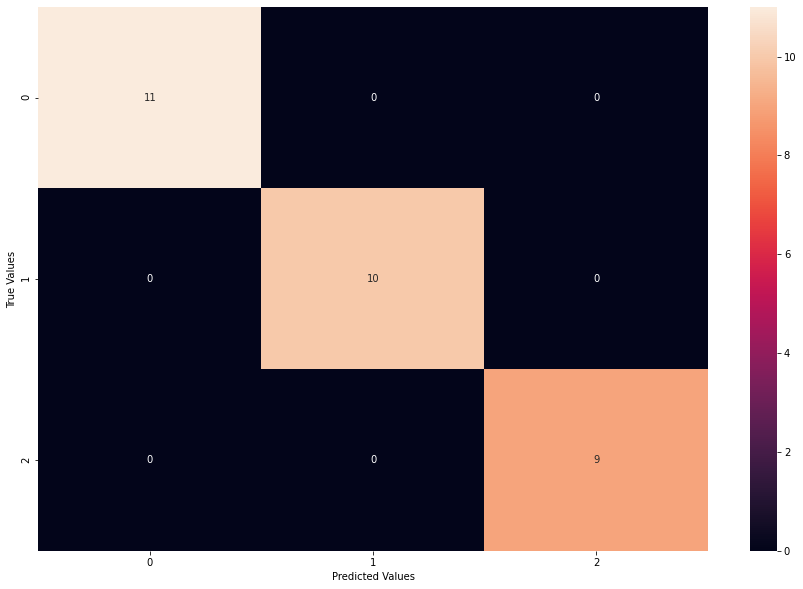

In [67]:
# Visualising the Confusion Matrix

# Setting graph size
plt.figure(figsize=(15,10))

# Plotting Confusion Matrix
sn.heatmap(iris_cm, annot=True)

# Setting graph labels
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

#### What does this graph show?

- Our model reflects a very strong accuracy score
- There wasn't one instance of our model missing